# Import databases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## SQLite

In [11]:
# !pip install ipython-sql
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [21]:
%sql sqlite:////Users/alexandertin/Desktop/Citibike/data/sqlite3/citi_bike_year.db

In [14]:
df_total = pd.DataFrame(total)

In [3]:
subsample5 = pd.read_csv('/Users/alexandertin/Desktop/Citibike/data/sqlite3/schwinning_5_subsample.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
subsample5

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,counter,year,age
0,766,2013-07-01 00:02:16.000,2013-07-01 00:15:02.000,432.0,E 7 St & Avenue A,40.726218,-73.983799,336.0,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2,1,2013,33
1,517,2013-07-01 00:06:57.000,2013-07-01 00:15:34.000,285.0,Broadway & E 14 St,40.734546,-73.990741,531.0,Forsyth St & Broome St,40.718939,-73.992663,18310,Subscriber,1985,1,1,2013,28
2,1840,2013-07-01 00:07:23.000,2013-07-01 00:38:03.000,146.0,Hudson St & Reade St,40.716250,-74.009106,495.0,W 47 St & 10 Ave,40.762699,-73.993012,15165,Subscriber,1990,1,1,2013,23
3,1224,2013-07-01 00:08:43.000,2013-07-01 00:29:07.000,357.0,E 11 St & Broadway,40.732618,-73.991580,79.0,Franklin St & W Broadway,40.719116,-74.006667,15105,Customer,\N,0,1,2013,2013
4,1020,2013-07-01 00:25:51.000,2013-07-01 00:42:51.000,468.0,Broadway & W 55 St,40.765265,-73.981923,448.0,W 37 St & 10 Ave,40.756604,-73.997901,17243,Customer,\N,0,1,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955444,42,2020-05-31 20:12:55.096,2020-05-31 20:21:57.664,3481.0,York St,40.716490,-74.041050,3203.0,Hamilton Park,40.727596,-74.044247,42224,Subscriber,1984,2,1,2020,36
4955445,692,2020-05-31 20:15:14.264,2020-05-31 20:43:26.760,3192.0,Liberty Light Rail,40.711242,-74.055701,3276.0,Marin Light Rail,40.714584,-74.042817,42482,Customer,1998,1,1,2020,22
4955446,451,2020-05-31 20:32:33.753,2020-05-31 20:56:45.406,3681.0,Grand St,40.715178,-74.037683,3639.0,Harborside,40.719252,-74.034234,42250,Customer,1999,1,1,2020,21
4955447,17,2020-05-31 20:35:23.641,2020-05-31 20:42:20.997,3679.0,Bergen Ave,40.722104,-74.071455,3280.0,Astor Place,40.719282,-74.071262,42444,Customer,2002,1,1,2020,18


In [4]:
subsample5.shape

(4955449, 18)

In [4]:
subsample5.starttime = pd.to_datetime(subsample5.starttime)
subsample5.stoptime = pd.to_datetime(subsample5.stoptime)

In [5]:
subsample5.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                         object
gender                              int64
counter                             int64
year                                int64
age                                 int64
dtype: object

In [9]:
subsample5.starttime

0         2013-07-01 00:02:16.000
1         2013-07-01 00:06:57.000
2         2013-07-01 00:07:23.000
3         2013-07-01 00:08:43.000
4         2013-07-01 00:25:51.000
                    ...          
4955444   2020-05-31 20:12:55.096
4955445   2020-05-31 20:15:14.264
4955446   2020-05-31 20:32:33.753
4955447   2020-05-31 20:35:23.641
4955448   2020-05-31 21:59:00.139
Name: starttime, Length: 4955449, dtype: datetime64[ns]

In [6]:
sub5 = subsample5.copy()

In [7]:
#Separate date columns
sub5['year'] = sub5['starttime'].dt.year
sub5['month'] = sub5['starttime'].dt.month
sub5['day'] = sub5['starttime'].dt.day
sub5['time'] = sub5['starttime'].dt.time


In [9]:
#Before removing NAs
sub5.shape

(4955449, 21)

In [12]:
sub5.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bikeid                          0
usertype                     2579
birth_year                 251023
gender                          0
counter                         0
year                            0
age                             0
month                           0
day                             0
time                            0
dtype: int64

In [10]:
#Remove NAs

sub5 = sub5[~(sub5.start_station_id.isna() |
             sub5.end_station_id.isna())]


In [11]:
sub5.shape
# Total 1,064 removed. With removing those, only usertype (0.05%) and birth_year (5%) are columns with missing values

(4954385, 21)

In [18]:
# Remove rides with duration longer than 1 hour
sub5 = sub5[~(sub5.tripduration >= 3600)].reset_index(drop=True)

#Removed 23,777 rides over 1 hour (0.5%)

In [37]:
sub5.shape

(4930608, 22)

In [25]:
#New column with day of the week
sub5['DoW'] = sub5.starttime.dt.day_name

In [26]:
sub5.head(10).T

,0,1,2,3,4,5,6,7,8,9
tripduration,766,517,1840,1224,1020,736,643,899,406,876
starttime,2013-07-01 00:02:16,2013-07-01 00:06:57,2013-07-01 00:07:23,2013-07-01 00:08:43,2013-07-01 00:25:51,2013-07-01 00:28:01,2013-07-01 00:28:10,2013-07-01 00:32:55,2013-07-01 00:34:15,2013-07-01 00:40:23
stoptime,2013-07-01 00:15:02,2013-07-01 00:15:34,2013-07-01 00:38:03,2013-07-01 00:29:07,2013-07-01 00:42:51,2013-07-01 00:40:17,2013-07-01 00:38:53,2013-07-01 00:47:54,2013-07-01 00:41:01,2013-07-01 00:54:59
start_station_id,432,285,146,357,468,268,489,320,335,2003
start_station_name,E 7 St & Avenue A,Broadway & E 14 St,Hudson St & Reade St,E 11 St & Broadway,Broadway & W 55 St,Howard St & Centre St,10 Ave & W 28 St,Church St & Leonard St,Washington Pl & Broadway,1 Ave & E 18 St
start_station_latitude,40.7262,40.7345,40.7163,40.7326,40.7653,40.7191,40.7507,40.7174,40.729,40.7342
start_station_longitude,-73.9838,-73.9907,-74.0091,-73.9916,-73.9819,-73.9997,-74.0018,-74.0058,-73.994,-73.9802
end_station_id,336,531,495,79,448,387,225,445,479,393
end_station_name,Sullivan St & Washington Sq,Forsyth St & Broome St,W 47 St & 10 Ave,Franklin St & W Broadway,W 37 St & 10 Ave,Centre St & Chambers St,W 14 St & The High Line,E 10 St & Avenue A,9 Ave & W 45 St,E 5 St & Avenue C
end_station_latitude,40.7305,40.7189,40.7627,40.7191,40.7566,40.7127,40.742,40.7274,40.7602,40.723


## Rider Volume by Time of Day

In [29]:
rider_volume = sub5[['starttime','year','month','day','time','counter','age','gender']]

#For visualization, create column to aggregate by hour
rider_volume['hour'] = rider_volume.time.astype(str).str[:2]
rider_volume['hour'] = rider_volume['hour'].astype(int)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
# Daily rider volume
rider_volume_graph = rider_volume.groupby(['year','month','day','hour']).size().reset_index().rename(columns={0:'N'})

In [36]:
rider_volume_graph

,year,month,day,hour,N
0,2013,6,1,0,13
1,2013,6,1,1,7
2,2013,6,1,2,5
3,2013,6,1,3,2
4,2013,6,1,6,3
...,...,...,...,...,...
60041,2020,5,31,19,267
60042,2020,5,31,20,179
60043,2020,5,31,21,91
60044,2020,5,31,22,83


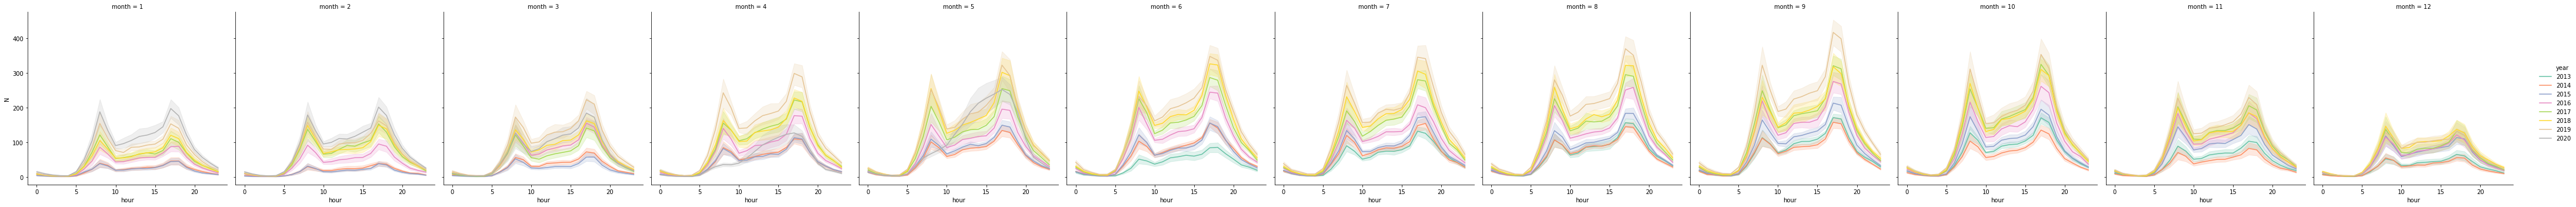

In [40]:
#Visualization of 24 hours by month (2013-2020)
sns.relplot(x='hour', y='N', hue ='year', col ='month', data=rider_volume_graph, kind='line', legend='full', palette='Set2')

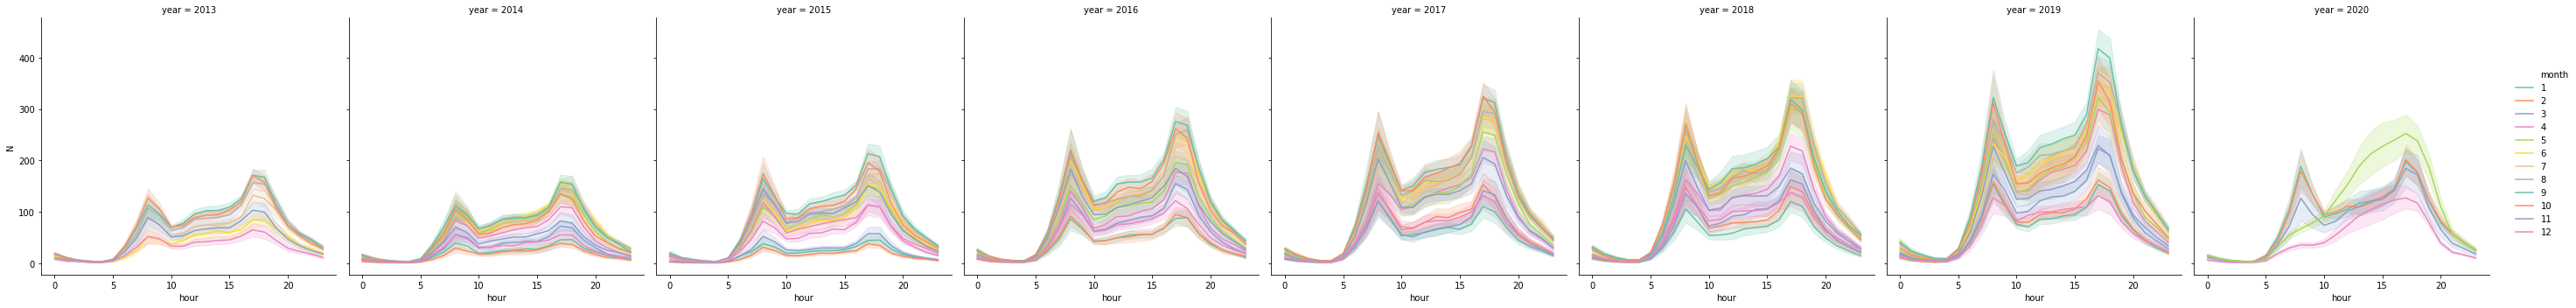

In [41]:
# Visualization of 24 hours by year (aggregated months)
sns.relplot(x='hour', y='N', hue ='month', col ='year', data=rider_volume_graph, kind='line', legend='full', palette='Set2')

In [139]:
sub5.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'counter', 'year', 'age', 'month', 'day',
       'time', 'DoW'],
      dtype='object')

In [138]:
sub5.groupby(['year','month','hour']).agg({'counter':sum})

KeyError: 'hour'

In [124]:
# Aggregate the number of rides per hour, separated by year, month
hour_pop = rider_volume.groupby(['year','month','hour']).agg({'counter':sum})

# Sort no. of riders by hour values in descending order
hour_pop2 = hour_pop.sort_values(by=['year','month','counter'], ascending = False).reset_index()

In [135]:
#take top 4 hours of each month
top_hours = hour_pop2.groupby(['year','month']).head(4)

In [137]:
top_hours.T

,0,1,2,3,24,25,26,27,48,49,...,1946,1947,1968,1969,1970,1971,1992,1993,1994,1995
year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
month,5,5,5,5,4,4,4,4,3,3,...,8,8,7,7,7,7,6,6,6,6
hour,17,16,18,15,17,16,18,15,17,18,...,19,16,17,18,19,8,18,17,19,16
counter,7833,7422,7394,7054,3820,3697,3524,3445,5727,5346,...,3819,3531,4103,3911,3197,2800,2571,2532,2022,1973


In [ ]:
# Conclusion: Top hours 

## Rider by gender/age

## Top Stations (including year counter)

## Question 3 - Dock Station Dynamics

## Exploration